In [23]:
# import prereqs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import seaborn as sn
from IPython.display import display, HTML
import ipywidgets as widgets
from matplotlib.patches import FancyBboxPatch

%matplotlib inline

#import data

housing =  pd.read_csv("Housing.csv")




In [24]:
display(HTML("""
             <h1 style="text-align:center">Housing Prices</h1>
             <h2 style="text-align:center"> An interactive Dashboard to review housing price trends </h2>
             <p> These three visaualizations show some of the trends associated with the data set. The first graph shows the correlation of price and the total area or square footage of the home.
             The second two graphs are violin plots that show housing prices by number of bedrooms and stories. The widest part of the "violin" portion of the graph accounts
             for the highest number of homes in that price range. The median price is also marked.</p>
             """))

In [25]:
#Converting string values to numeric. 
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})
housing['furnishingstatus'] = housing['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 0})





,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,1


In [43]:
# checking for null values
# housing. isna(). sum(). sum() #uncomment This line to check


In [44]:
#there are no null values
from sklearn.linear_model import Ridge

np.random.seed(42)

x = housing.drop("price", axis=1)
y = housing["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

model = Ridge()
model.fit(x_train, y_train);

# model.score(x_test, y_test) uncomment this line to check model accuracy

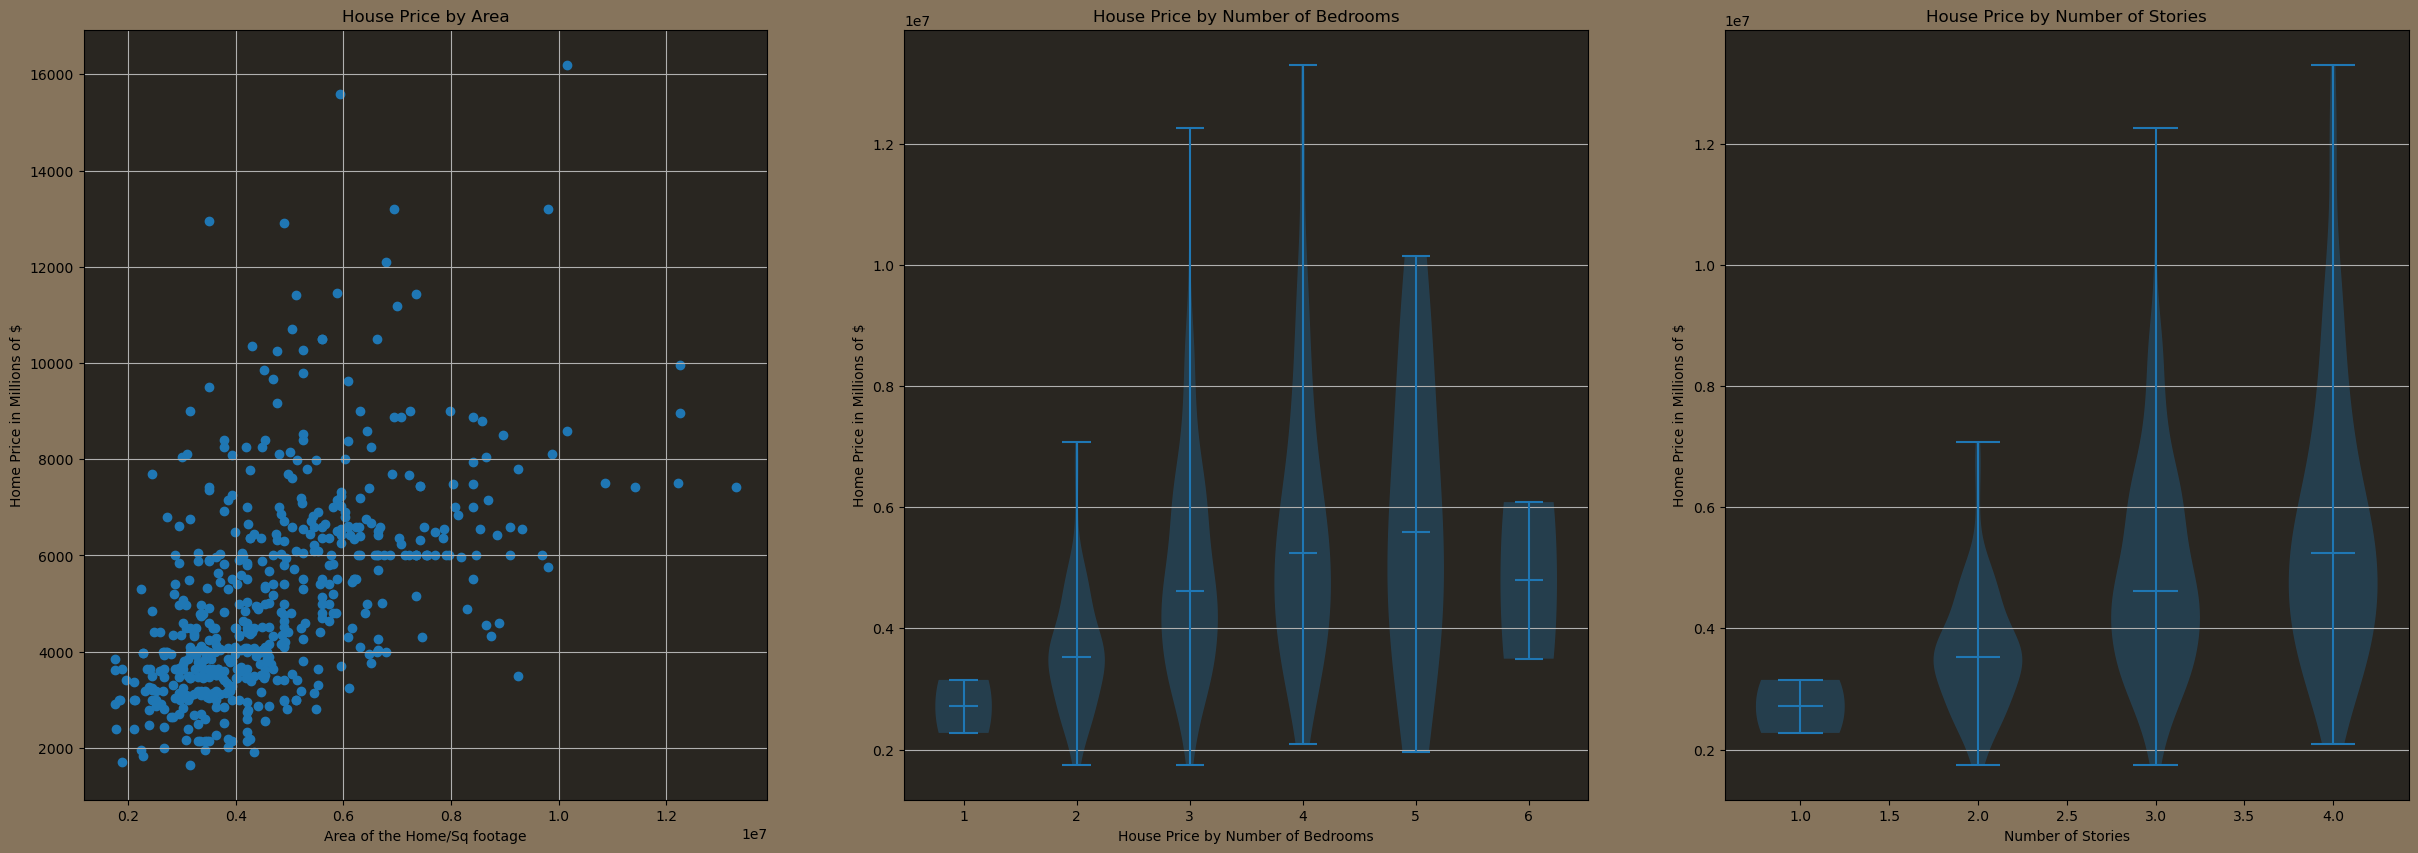

In [45]:
# Histogram number one

b1 = housing["price"][housing["bedrooms"]==1]
b2 = housing["price"][housing["bedrooms"]==2]
b3= housing["price"][housing["bedrooms"]==3]
b4 = housing["price"][housing["bedrooms"]==4]
b5 = housing["price"][housing["bedrooms"]==5]
b6 = housing["price"][housing["bedrooms"]==6]

hpb = [b1,b2,b3,b4,b5,b6]

s1 = housing["price"][housing["bedrooms"]==1]
s2 = housing["price"][housing["bedrooms"]==2]
s3= housing["price"][housing["bedrooms"]==3]
s4 = housing["price"][housing["bedrooms"]==4]

hps =  [s1,s2,s3,s4]

y = housing["price"];
x = housing["area"];
b = housing["bedrooms"];
s = housing["stories"];

fx, ((ax, ax1, ax2)) = plt.subplots(figsize=(30,10),facecolor="#86745C",ncols=3);

ax.scatter(y, x);
ax.set(title="House Price by Area",
       facecolor="#292621",
       xlabel="Area of the Home/Sq footage", 
       ylabel="Home Price in Millions of $");
ax.grid()

ax1.violinplot(hpb, showmedians=True);
ax1.set(title="House Price by Number of Bedrooms",
        facecolor="#292621",
        xlabel="House Price by Number of Bedrooms",
        ylabel="Home Price in Millions of $"
       ); 
ax1.grid(axis="y")

ax2.violinplot(hps, showmedians=True);
ax2.set(title="House Price by Number of Stories",
        facecolor="#292621",
        xlabel="Number of Stories",
        ylabel="Home Price in Millions of $",
        alpha=1.0
        ); 
ax2.grid(axis="y",)







In [46]:
display(HTML("""
             
             <h2> This heat map shows correlations between the different available parameters. </h2>
             """))

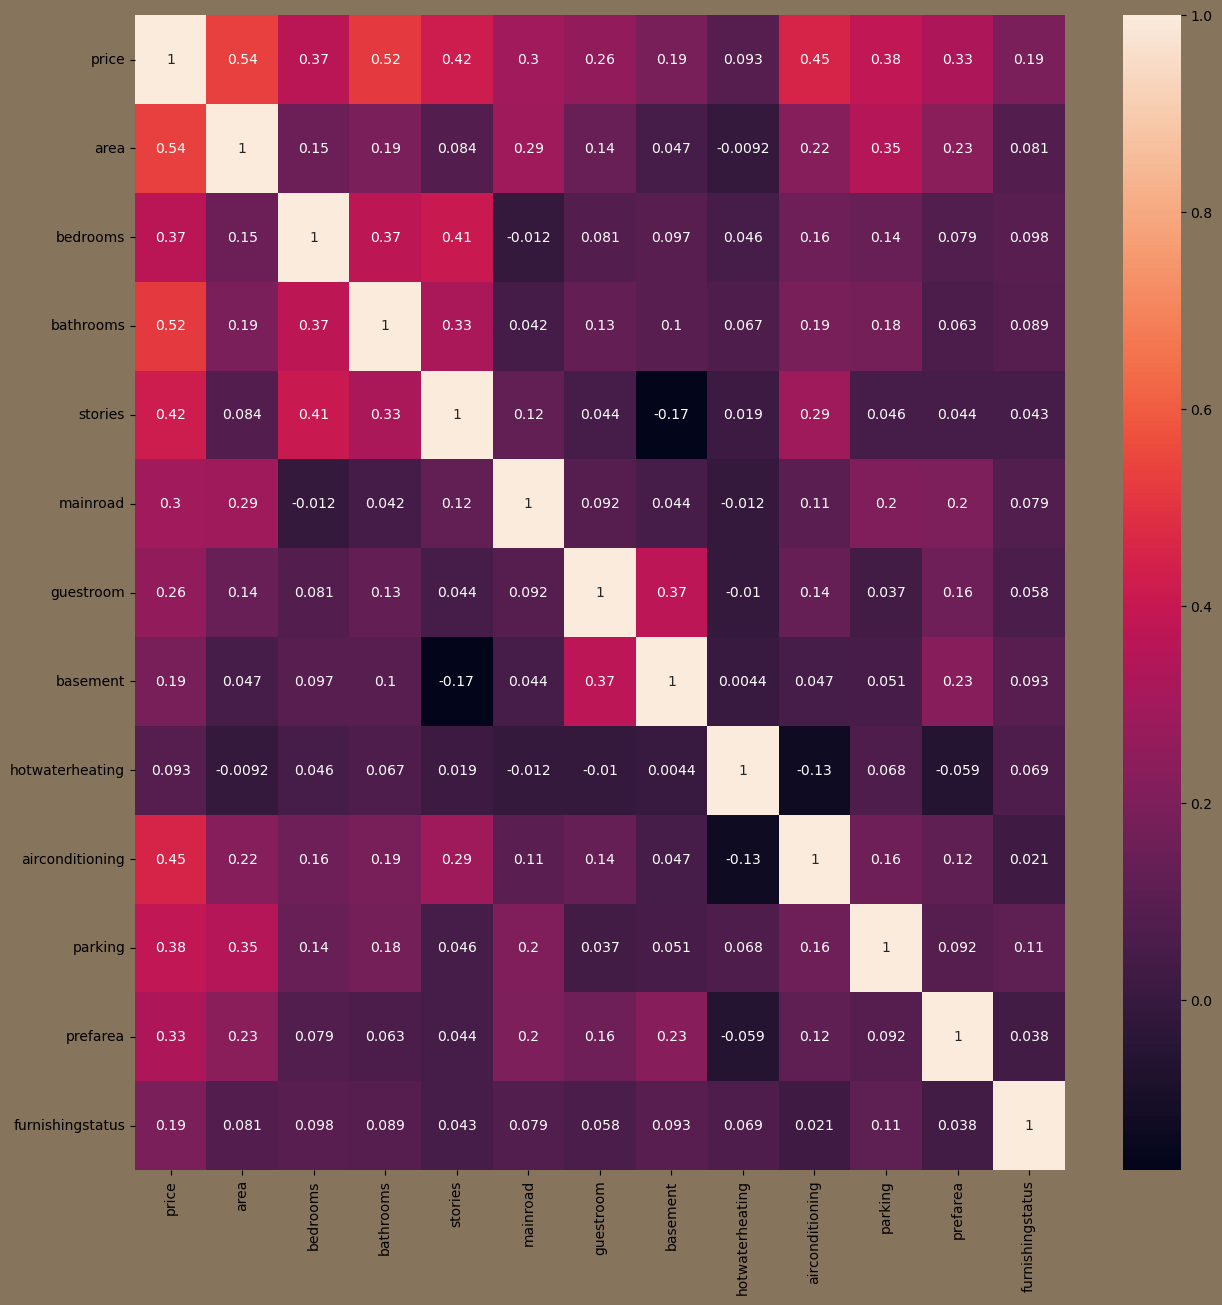

In [47]:
fx, ax = plt.subplots(figsize=(15,15),facecolor='#86745C')
ax = sn.heatmap(housing.corr(), annot=True)

In [48]:
display(HTML("""
             <h1>Listing Price Predictor</h1>
             <h2> Use this to tool to estimate price based on a homes features. </h2>
             """))

In [53]:
mainroad = widgets.Checkbox(value=False,disabled=False)
guestroom = widgets.Checkbox(value=False,disabled=False)
basement = widgets.Checkbox(value=False,disabled=False)
hotwater = widgets.Checkbox(value=False,disabled=False)
AC = widgets.Checkbox(value=False,disabled=False)

l1 = widgets.HBox([widgets.Label(value="Is the house near a mainoad?"), mainroad])
l2 = widgets.HBox([widgets.Label(value="Does the house have a guestroom?"), guestroom])
l3 = widgets.HBox([widgets.Label(value="Does the house have a basement?"), basement])
l4 = widgets.HBox([widgets.Label(value="Does the house have a hot water heating?"), hotwater])
l5 = widgets.HBox([widgets.Label(value="Does the house have airconditioning?"), AC])
   
cb = widgets.VBox([l1,l2,l3,l4,l5])

parking = widgets.Dropdown(
    options=['0','1', '2', '3'],
    value='0',
    disabled=False
)

bedrooms = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    disabled=False
)

bathrooms = widgets.Dropdown(
    options=['1','2', '3'],
    value='1',
    disabled=False
)

stories = widgets.Dropdown(
    options=['1','2', '3', '4'],
    value='1',
    disabled=False
)

furnished = widgets.Dropdown(
    options=['furnished','semi-furnished', 'unfurnished'],
    value='unfurnished',
    disabled=False
)

l5 = widgets.HBox([widgets.Label(value="how many parking spaces are available?"), parking])
l6 = widgets.HBox([widgets.Label(value="how many bedrooms does the house have?"), bedrooms])
l7 = widgets.HBox([widgets.Label(value="how many bathrooms does the house have?"), bathrooms])
l8 = widgets.HBox([widgets.Label(value="how many stories is the house?"), stories])
l9 = widgets.HBox([widgets.Label(value="Is the house furnished?"), furnished])

dd = widgets.VBox([l5,l6,l7,l8,l9])

area = widgets.IntSlider(
    value=4000,
    min=1000,
    max=17000,
    step=25,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

area
slide = widgets.VBox([widgets.Label(value="What is the area(sq/ft) of the house?"), area])

q = widgets.HBox([slide, dd, cb])

button = widgets.Button(
    description='Click to Get Estimate',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to get estimate',
    
)
button


estimatedOutput = widgets.Label(value = "0.0")
#estimatedOutput = widgets.Output(layout={'border': '1px solid black'})
out = widgets.HBox([widgets.Label(value = "Estimated Value : $"), estimatedOutput])

#with estimatedOutput:
#   print(0.0)


widgets.VBox([q, button, out])

In [ ]:
def estimate ():  
    areav = area.value
    bedroomsv = bedrooms.value
    bathroomsv = bathrooms.value
    storiesv = stories.value
    mainroadv = mainroad.value
    guestroomv = guestroom.value
    basementv = basement.value
    hotwaterv = hotwater.value
    ACv = AC.value
    parkingv = parking.value
    furnishedv = furnished.value
    
    if (furnishedv == "unfurnished"):
        furnishedvc = 0
    elif (furnishedv == "semi-furnished"):
        furnishedvc = 1
    elif (furnishedv == "furnished"):
        furnishedvc = 2    
    
    print("area = ", areav)
    print("bedrooms = ", bedroomsv)
    print("bathrooms = ", bathroomsv)
    print("stories = ", storiesv)
    print("mainroad = ",  mainroadv)
    print("guestroom = ", guestroomv)
    print("basement = ", basementv)
    print("hotwaterheating = ", hotwaterv)
    print("AC = ", ACv)
    print("parking =", parkingv)
    print("furnishingstatus =", furnishedvc)
    
    
        
    
    prefarea = 1
    
    guess = [[areav, bedroomsv, bathroomsv, storiesv, mainroadv, guestroomv, basementv, hotwaterv,
          ACv, parkingv, prefarea,furnishedvc]]


    test = pd.DataFrame(guess, columns=x_train.columns.values.tolist())

    pred = model.predict(test).round()

    result = pred[0].round()
    
    return result
    

In [50]:
def button_on_click(b):
    estimatedOutput.value = str(estimate())
    


In [51]:
button.on_click(button_on_click)